# EJERCICIO minimización: 

Se desea construir una caja de base cuadrada, con tapa y con una capacidad de 80 dm$^3$. Para la tapa y la superficie lateral se quiere utilizar un material que cuesta 2€/dm$^2$ y para la base otro que cuesta 3€/dm$^2$. Calcula las dimensiones de la caja para que su costo sea mínimo.

**Nota:** Este ejercicio cayó en la ABAU (prueba de acceso a la universidad) de Galicia en el año 2017. Aquí podéis consultar el examen completo:

https://ciug.gal/PDF/examesabauanosanteriores/probas/2017/ABAU_2017_MatematicasII.pdf

**Solución:**

Tenemos entonces una caja de base cuadrada, con longitud $x$, y altura $h$, como mostramos en la siguiente figura:

<img src="../../images/hexaedro2.png" width="300"/>

Vamos a fijar la restricción. 
Nos dicen que el volumen debe ser igual a 80 dm$^3$, entonces:

$$
V = x^2 h \Longrightarrow 80 = x^2 h \Longrightarrow h = \frac{80}{x^2}.
$$

El enunciado nos dice que usamos un material que cuesta 2 €/dm$^2$ para la tapa y para cada una de las 4 paredes laterales y otro material (entendemos que más duro...) que cuesta 3 €/dm$^2$ para la base. Entonces, si llamamos $C$ al coste en material de la caja:

\begin{align*}
C(x,h) & = \left( x^2 + 4xh\right) 2 + 3 x^2 \\
& \stackrel{\stackrel{\color{blue}{h = \frac{80}{x^2}}}{\downarrow}}{\Longrightarrow}
C(x) = \left( x^2 + 4x\frac{80}{x^2}\right) 2 + 3x^2 \Longrightarrow
C(x) = 5x^2 + \frac{640}{x}, \quad x\in (0,+\infty).
\end{align*}

Fijémonos que, como la variable está en el abierto $(0,+\infty)$, no se cumplen las hipótesis del Teorema de Weierstrass. 
**Eso no quiere decir que no exista mínimo absoluto**, simplemente que el teorema no lo garantiza y que tendremos que intentar demostrar que existe de otra manera. 

Entonces, si existe mínimo absoluto de esta función, ¿dónde puede estar? 
Fijémonos que, en $(0,+\infty)$ es una función continua y derivable, por lo que si tiene mínimos absolutos estarán o bien en los límites del intervalo, o bien en los puntos en los que la derivada valga $0$. ¡Vamos a explorar estar opciones!

\begin{align*}
& \lim_{x\to 0^+} C(x) = \lim_{x\to 0^+} \left(5x^2 + \frac{640}{x}\right) = 0 + \infty = +\infty, \\
& \lim_{x\to +\infty} C(x) = \lim_{x\to +\infty} \left(5x^2 + \frac{640}{x}\right) = + \infty + 0 = +\infty. \\
& C'(x) = 10x - \frac{640}{x^2} \Longrightarrow \left[ C'(x) = 0 \Leftrightarrow 10x - \frac{640}{x^2} = 0 \Leftrightarrow x = 4 \right] 
\end{align*}

Ahora miramos lo que pasa en $x=4$, para ello usaremos el criterio de la segunda derivada, aunque valdría perfectamente el de la primera derivada. Entonces:
$$
C''(x) = 10 + \frac{1280}{x^3} \Longrightarrow C''(4) = 30 >0,
$$
por lo que ya sabemos que en $x=4$ habrá un mínimo relativo. Este mínimo relativo será absoluto ya que hemos visto que en los extremos la función coste, $C(x)$, tiende a $+\infty$.

Por lo tanto, **la respuesta al ejercicio es:
$x=4$ dm, $h=\dfrac{80}{4^2}=5$ dm.**

Vamos ahora a hacer esos mismos cálculos con la ayuda de Python y a graficar la función:

In [8]:
import sympy as sp
x = sp.Symbol('x', real=True) 

# Definimos C con una expresión simbólica
expr = 5*x**2 + 640/x
print('C(x) = ',expr)
print('diff(C)(x) = ', sp.diff(expr, x))

# Calculamos los puntos criticos de C resolviendo la ecuacion diff(C) = 0
pto_critico = sp.solve(sp.diff(expr, x), x)

# Extraemos a como la primera (0, en Python) solucion de la ecuacion anterior (podría haber muchas soluciones)
a = pto_critico[0]
print('a = ',a)

# Evaluamos la derivada segunda en a
print('Derivada segunda de C en a: ', sp.diff(expr, x, 2).subs(x,a))

C(x) =  5*x**2 + 640/x
diff(C)(x) =  10*x - 640/x**2
a =  4
Derivada segunda de C en a:  30


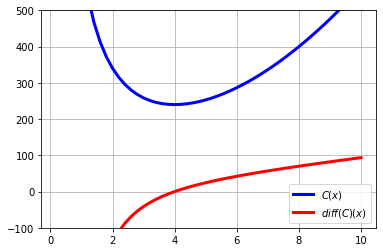

In [9]:
# importamos los módulos numpy y pyplot
import numpy as np
import matplotlib.pyplot as plt

# Damos valores de x para evaluar las funciones 
x = np.linspace(0.2, 10)

#Calculamos las 2 funciones (C y su derivada) en los puntos de x
y1 = 5*(x**2) + 640/x
y2 = 10*x - 640/(x**2)

# plot
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(x, y1, c='b', label=r'$C(x)$',linewidth=3.0)
ax.plot(x, y2, c='r', label=r'$diff(C)(x)$',linewidth=3.0)

plt.ylim(-100,500)
leg = plt.legend()

plt.grid()
plt.show()